In [169]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [8]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [10]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

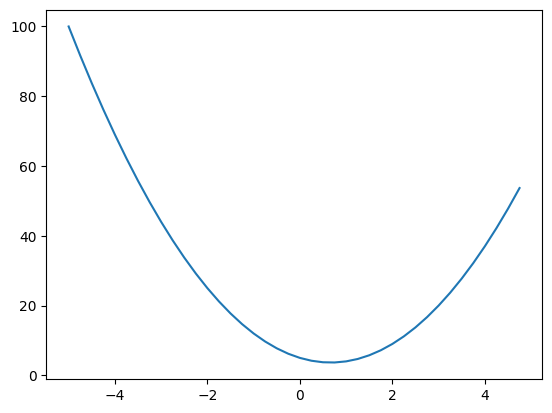

In [11]:
plt.plot(xs, ys)

In [17]:
h = 0.001
x = 3.0
f(x+h)

20.014003000000002

In [18]:
(f(x+h) - f(x))/h

14.00300000000243

In [20]:
h = 0.001
x = -3
(f(x+h) - f(x))/h

-21.996999999998934

In [22]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [23]:
h = 0.0000001
x = 2/3
(f(x+h) - f(x))/h

2.9753977059954195e-07

In [24]:
#let get more complex 

In [1]:
h = 0.0001

# 3 inputs a, b, c, how result d changes with repest of  
a = 2.0
b=-3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [4]:
# 3 inputs a, b, c, how result d changes with repest of b

d1 = a*b + c
b += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0001
d2 4.0003
slope 2.0000000000042206


In [5]:
# 3 inputs a, b, c, how result d changes with repest of c

d1 = a*b + c
c += h
d2 = a*b +c 

print ('d1', d1)
print ('d2', d2)
print ('slope', (d2 - d1)/ h)

d1 4.0003
d2 4.0004
slope 0.9999999999976694


In [ ]:
# neural network -> python data structure to maintain the mathematical NN expression 

In [40]:
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})" # provide a nicer looking of the BOX class, what's inside
    def __add__(self, other):
        return Value(self.data + other.data)
    def __mul__(self, other):
        return Value(self.data*other.data)

a = Value(2.0) 
a

Value(data=2.0)

In [ ]:
#python double underscore special methods, reserved

In [14]:
class MyClass:
    def __init__(self, value):
        self.value = value
    def __repr__(self):
        return f"MyClass(value={self.value})"
    def __str__(self):
        return f"Value is {self.value}"
obj = MyClass(10)
print(obj)  # Calls __repr__


Value is 10


In [15]:
class MyClass:
    def __init__(self, items):
        self.items = items
    def __len__(self):
        return len(self.items)
obj = MyClass([1, 2, 3])
print(len(obj))  # Calls __len__

3


In [ ]:
class MyClass:
    def __init__(self, value):
        self.value = value
    def __add__(self, other):
        return MyClass(self.value + other.value) # this + here is a typical 2 floting point addition 
obj1 = MyClass(10)
obj2 = MyClass(5)
obj3 = obj1 + obj2  # Calls __add__
print(obj3.value)  # Output: 15

In [ ]:
# finish

In [20]:
b = Value(-3.0);
b

Value(data=-3.0)

In [30]:
a + b 
# internally, python would call a.__add__(b), the + here is a python symbol, two object addtion 


Value(data=-1.0)

In [35]:
a*b
# internally, python would call a.__mul__(b)

Value(data=-6.0)

In [51]:
c = Value(10.0)
a*b + c 

Value(data=4.0)

In [54]:
d = a*b + c
# internally, d = (a.__mul(b)).__add(c)
d

Value(data=4.0)

In [ ]:
#Now what we are missing is the connected tissue of this expression, we want to keep these expression graphs, 
#we need to keep pointers about what values produce what other values, now update the data structure 

In [143]:
class Value:
    def __init__(self, data, _operands=(), _operator='', label = ''):
        self.data = data
        self._prev = set(_operands) # object involed with self in an operation, __children are objects participated in the operations
        self._op = _operator
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})" # provide a nicer looking of the BOX class, what's inside
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*')

a = Value(2.0, label = 'a') 
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d
print(d._prev, d._op)



{Value(data=10.0), Value(data=-6.0)} +


In [144]:
#make it one layer deeper 
f = Value(-2.0); f.label = 'f'
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [80]:
d._op

'+'

In [79]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [85]:
d._op
d._prev  # why only print out one, instead of two?

{Value(data=-6.0), Value(data=10.0)}

In [82]:
# here is the answer 
In a Jupyter cell, only the last bare expression is displayed. So:

python
Copy
Edit
d._op
d._prev
will only show d._prev. To see both, either:

python
Copy
Edit
print(d._op)
print(d._prev)
# or
d._op, d._prev      # returns a tuple so the single “last value” is that tuple
# or
{"op": d._op, "prev": d._prev}
In a regular .py script, neither line would print anything unless you use print().

SyntaxError: invalid syntax (842462376.py, line 1)

In [72]:
print(Value.__name__)
print(Value.__module__)
print(Value.__dict__)
print(Value.__bases__)

Value
__main__
{'__module__': '__main__', '__init__': <function Value.__init__ at 0x112acf280>, '__repr__': <function Value.__repr__ at 0x112acf310>, '__add__': <function Value.__add__ at 0x112acf3a0>, '__mul__': <function Value.__mul__ at 0x112acf430>, '__dict__': <attribute '__dict__' of 'Value' objects>, '__weakref__': <attribute '__weakref__' of 'Value' objects>, '__doc__': None}
(<class 'object'>,)


In [74]:
# indepth of python Class object 
Every user-defined class in Python automatically gets a bunch of built-ins—some created for the class object itself, and many inherited from object. You can use them before defining anything extra.

Class-level (on the class itself)
Common attributes Python adds when you do class Foo: ...:

Foo.__name__ – the class’s name ("Foo").

Foo.__qualname__ – qualified name (useful for nested classes).

Foo.__module__ – module where it was defined.

Foo.__doc__ – the class docstring (or None).

Foo.__dict__ – mapping of the class namespace (methods, attrs).

Foo.__annotations__ – type hints dict (if any).

Foo.__mro__ – method resolution order (tuple of bases to search).

Foo.__bases__ – base classes.

Foo.__subclasses__() – current subclasses of Foo.

Foo.__init_subclass__ – hook called when subclassing Foo.

Foo.__class__ – the metaclass (usually type).

Instance-level (on objects of the class)
Even if you don’t define anything, instances inherit default behavior from object:

obj.__class__ – the instance’s class.

obj.__dict__ – per-instance attribute storage (unless you use __slots__).

obj.__repr__(), obj.__str__() – default string displays (the “<Foo object at 0x…>” form).

obj.__eq__(), obj.__ne__(), obj.__hash__() – identity-based equality/hash by default.

obj.__getattribute__(), obj.__setattr__(), obj.__delattr__() – attribute access mechanics.

obj.__dir__() – names shown by dir(obj).

obj.__sizeof__(), obj.__reduce__()/__reduce_ex__() – memory/pickling helpers.

Note: If you define __slots__, instances typically won’t have __dict__ unless you explicitly include "__dict__" in __slots__. Similarly for weakrefs with "__weakref__".

SyntaxError: invalid syntax (1617303727.py, line 1)

In [89]:
import sys
print("Kernel Python:", sys.executable)           # sanity check
!{sys.executable} -m pip install -U graphviz

Kernel Python: /Library/Developer/CommandLineTools/usr/bin/python3
Defaulting to user installation because normal site-packages is not writeable


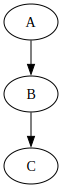

In [90]:
from graphviz import Digraph
g = Digraph(format="svg")
g.edge("A","B"); g.edge("B","C")
g  # should display inline in Jupyter

In [137]:
# graphviz open source, to nicely vitualize 

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

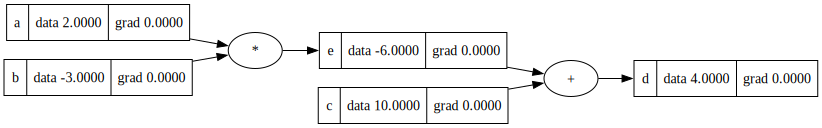

In [138]:
draw_dot(d)

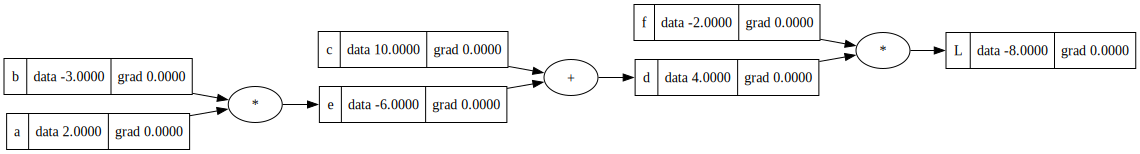

In [145]:
draw_dot(L)

In [134]:
# so far able to 
# 1. build mathmetical expression use * and +, scalar values, 
# 2. graph it as this forward pass, multi inputs: a, b, c, f, 
# the output of this forward pass is -8 
# now run backpropegation manually, start with L, reverse, 
# calculate the gradient along all these interdiate values; 
# computer the derivative of each node with respect to L 

# the derivative of L with repect to L is => dL/dL = (L2-L1)/h = (f(x+h)-f(x))/h = (L+h)- L /h = 1 => when L increase 1, L will change +1
# the derivative of L with repect to f is => dL/df = (L2-L1)/h = (d*(f+h) - d*f)/h = d = 4 => when f increase 1, L will change +4 
# the derivative of L with repect to d is => dL/dd = (L2-L1)/h = ((d+h)*f - d*f)/h = f = -2 => when d increase 1, L will change -2 
# the derivative of L with repect to c is => dL/dc = (dL/dd) * (dd/dc) = -2 * 1 = -2, => when c increase 1, L will change -2
# dd/dc = (d2 - d1)/h = (((c+h) + e)- (c+e)) / h = 1
# the derivative of L with repect to e is => dL/de = dL/dd * dd/de = -2 * 1 = -2, => when e increase 1, L will change -2
# dd/de = (d2 - d1)/h = ((c+(e+h)) - (c+e)) / h = 1
# the derivative of L with repect to a is => dL/da = dL/dd * dd/de * de/da = -2 * 1 * -3 = 6 => when a increase 1, L will change +6
# de/da = (e2 - e1) / h = ((a+h)*b - a*b) / h = b = -3
# the derivative of L with repect to b is => dL/db = dL/dd * dd/de * de/db = -2 * 1 * 2 = -4 => when b increase 1, L will change -4 
# de/db = (e2 - e1) / h = (a*(b+h) - a*b) / h = a = 2

# these are local derivative, f and d is one step away from L 
# dL/df
# dL/dd

# c and e impact d then impact L, c and e is more than one step away from L, how to write the impact of c on L? Chain Rule 
# dL/dc
# dL/de

# if cars travels twice as fast as bicycle,
# bicycle is four times as fast as walking man
# the car travels ? times as fast as the walking man?

# c = 2b, c/b = 2
# b = 4m, b/m = 4
# so 
# X = c/m = (c/b) * (b/m) = 2 * 4 = 8


In [ ]:
# create a variable to represent the derivate of Loss function with repect to that Value, which we name is as gradient(grad)
# updated Class Value, added self.grad = 0.0, by default, nodes has no impact on the loss function 

In [159]:
# create a gating function, to avoid pullute or mess up global scope, create a little staging area, in python, make all vars to be local var to the LOL function 
def lol():
    h = 0.001
    
    a = Value(2.0, label = 'a') 
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0); f.label = 'f'
    L = d * f; L.label = 'L'

    L1 = L.data

    a = Value(2.0, label = 'a')
    # a = Value(2.0 + h, label = 'a')  # a increase 0.001
    b = Value(-3.0, label = 'b')  # b increase 0.001
    c = Value(10.0, label = 'c')  # c increase 0.001
    e = a*b; e.label = 'e'
    # e.data += h
    d = e + c; d.label = 'd'
    # d.data += h
    f = Value(-2.0); f.label = 'f'  # f increase 0.001
    L = d * f; L.label = 'L'

    L2 = L.data

    # print out derivative of L with repect of each node
    print ((L2 - L1 ) / h)  

    # numerically verify devrivative of L with repect of each node, inline gradient check, 
    # deriving derivative of L with repect of all intermediate results  
    # numerical gradiant is just estimate it using small step size:
    # nudging node by h, see what happens to L 
    
    # dL/dL = 1.000000000000334, when h = 0.001; dL/dL = 0.9999999999976694, when h = 0.0001
    # dL/da = 6.000000000000227, when h = 0.001;
    # dL/db = -3.9999999999995595, when h = 0.001; 
    # dL/dc = -1.9999999999988916, when h = 0.001;
    # dL/dd = -2.000000000000668, when h = 0.001;
    # dL/de = -2.000000000000668, when h = 0.001;
    # dL/df = 3.9999999999995595, when h = 0.001;

lol()

0.0


In [161]:
# manually update each Value object with Grad number 
a.grad = 6.0
b.grad = -4.0
c.grad = -2.0
d.grad = -2.0
e.grad = -2.0
f.grad = 4.0

# manual back propergation all the way from L to leaf nodes: a and b 
# we just iterate through all the nodes, one by one, and locally apply the chain rule, 
# we always know what the derivate of L with repect of this little output, we look at how this output is produced, 
# this output was produced through some operation, and we have the points to these childern nodes of this operation
# in this operation, we know the local derivates are, and we just multiply them, onto the derivative always, 

# back propergation is: recrusively multiply on the local derivatives => recursively application of chain rule, 
# backwards through the computation graph

In [166]:
# lets see the power of back propergation 
# we want to make L go up, how can we nudge our inputs?

# intuitively, a should increase, b should decrease, c, d, e all decrease, f increase 

# how to use mathmetically language to reperesent our intuition?
# a.data = a.data + 0.01
# b.data = b.data - 0.01
# c.data = c.data - 0.01


# generalize this into: (we pick node a, b, c, f, because they are leaf node, we usually have control over them )
a.data += 0.01*(a.grad)
b.data += 0.01*(b.grad)
c.data += 0.01*(c.grad)
f.data += 0.01*(f.grad)

e = a*b; 
d = e + c; 
L = d*f
print(L.data)

-4.572000000000001


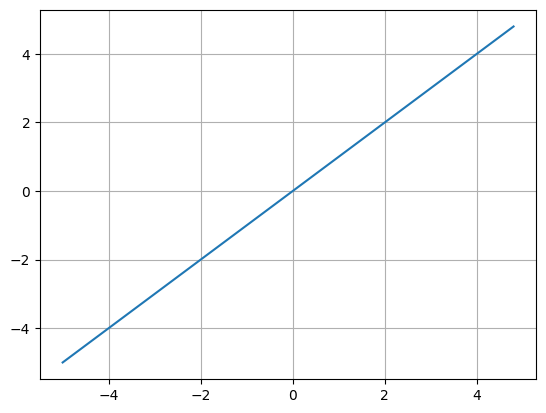

In [174]:
# back propergate through a neuron

# neuron networks, in the simplest case, these are multilateral perceptrons, diff layer, neurons are fully connected to each other 
# biologically neurons are very complicated devices, but we have very simple mathematical models of them. 

# some inputs axis(X0), then synapses that has weights on them(W0), 
# the synapse interact with the input to this neuron multiplicatively 
# so what flows to the cell body of this neuron is W0 * X0

# b is the innate of trigger happiness of this neuron, 
# so this bias can make it a bit more trigger happy, or a bit less trigger happy, regardless of the input 

# take all the w and b into activation function, some sort of squashig function, like sigmod, tanh 


plt.plot(np.arange(-5, 5, 0.2), np.arange(-5, 5, 0.2)); plt.grid()

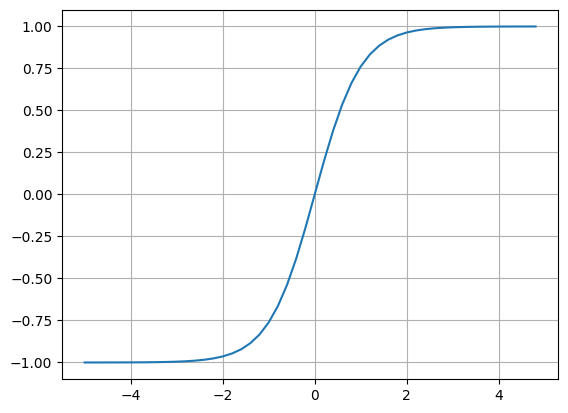

In [180]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5,5, 0.2))); plt.grid()

# tanh activation function: 

# the same input x, y get sqaushed
# at 0 we get 0
# as input go more positive, y will only go up to 1, and then plateau out, cap the result of the function smoothly to 1
# as input go negative, y get cap smoothly to -1


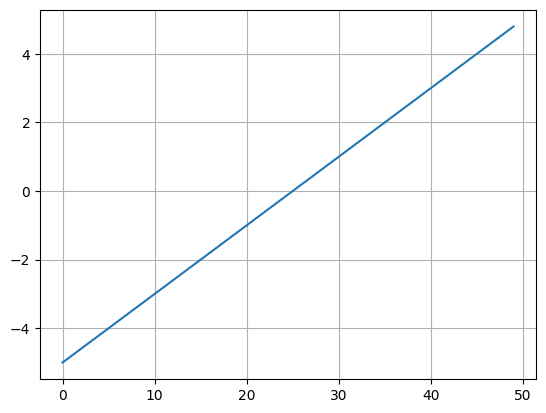

In [177]:
# play with plt.plot 
y = np.arange(-5, 5, 0.2)
plt.plot(y); 
plt.grid()